## Tomasz Burblis

## Zadanie 6.2

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.signal import chirp as co
import scipy.io.wavfile as wav
import warnings 
import sys
import IPython.display as ipd
from IPython.display import Image
import cv2
import warnings
warnings.filterwarnings('ignore')

40000
40000


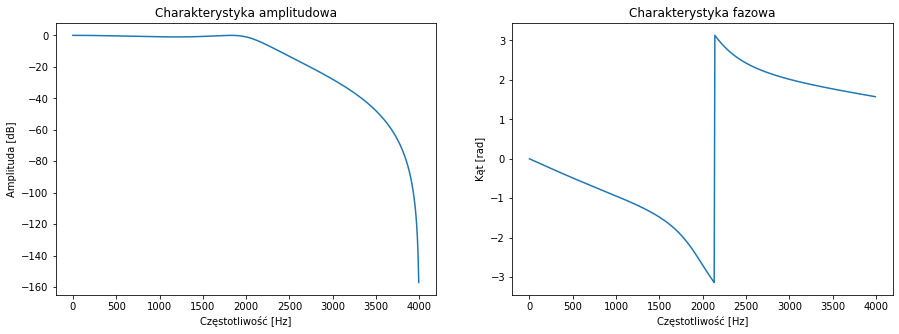

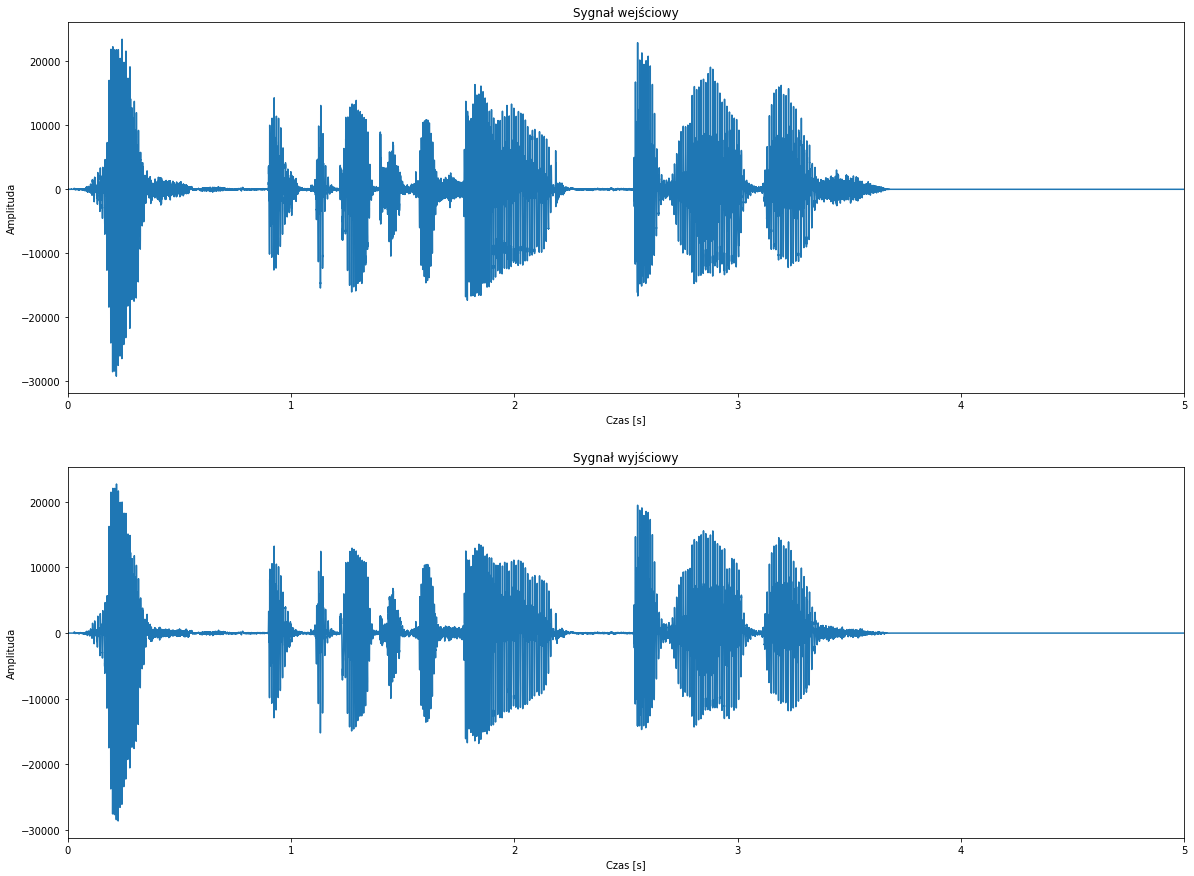

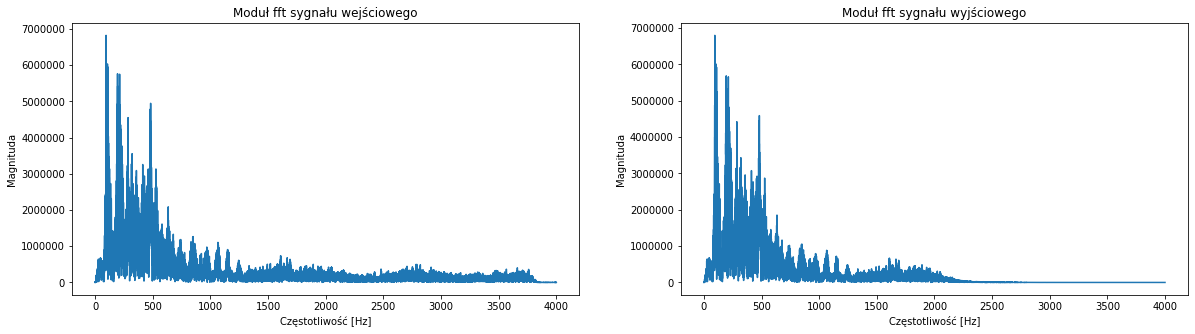

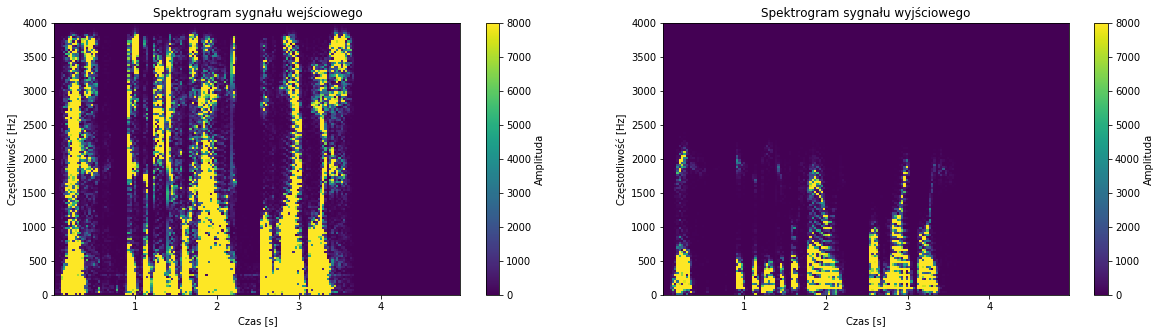

In [2]:
from scipy.io import wavfile
import IPython.display as ipd
fg = 2000 # Graniczna

filter_order = 3

fs1, voice = wavfile.read("voice.wav")
x = np.linspace(0, 5, 5 * fs1)

Wn = 2000 / (fs1 / 2)

filtr_b, filtr_a = signal.cheby1(filter_order, 1, Wn, btype='lowpass')
frecx = np.linspace(0, fs1, fs1 * 5)
frec, res = signal.freqz(filtr_b, filtr_a)

length = len(res)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.title("Charakterystyka amplitudowa")
plt.xlabel("Częstotliwość [Hz]")
plt.ylabel("Amplituda [dB]")
plt.plot((frec * fs1) / (2 * np.pi), 20 * np.log10(np.abs(res)))

plt.subplot(1, 2, 2)
plt.plot((frec * fs1) / (2 * np.pi), np.angle(res))
plt.title("Charakterystyka fazowa")
plt.xlabel("Częstotliwość [Hz]")
plt.ylabel("Kąt [rad]")

plt.figure(figsize=(20, 15))
plt.subplot(2, 1, 1)
plt.title("Sygnał wejściowy")
plt.xlim(0, 5)
plt.xlabel("Czas [s]")
plt.ylabel("Amplituda")
plt.plot(x, voice)

filtered_voice = signal.filtfilt(filtr_b, filtr_a, voice)

plt.subplot(2, 1, 2)
plt.title("Sygnał wyjściowy")
plt.xlim(0, 5)
plt.xlabel("Czas [s]")
plt.ylabel("Amplituda")
plt.plot(x, filtered_voice)



plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.title("Moduł fft sygnału wejściowego")
plt.xlabel("Częstotliwość [Hz]")
plt.ylabel("Magnituda")
plt.plot(frecx[0:20000], np.abs(np.fft.fft(voice))[0:20000])


print(len(frecx))
print(len(voice))

plt.subplot(1, 2, 2)
plt.title("Moduł fft sygnału wyjściowego")
plt.xlabel("Częstotliwość [Hz]")
plt.ylabel("Magnituda")
plt.plot(frecx[0:20000], np.abs(np.fft.fft(filtered_voice))[0:20000])


plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.title("Spektrogram sygnału wejściowego")
plt.xlabel("Czas [s]")
plt.ylabel("Częstotliwość [Hz]")
f, t, Sxx = signal.spectrogram(voice, fs1, scaling="spectrum")
plt.pcolormesh(t, f, Sxx,vmax=8000)
plt.colorbar(label="Amplituda")

plt.subplot(1, 2, 2)
plt.title("Spektrogram sygnału wyjściowego")
plt.xlabel("Czas [s]")
plt.ylabel("Częstotliwość [Hz]")
f1, t1, Sxx1 = signal.spectrogram(filtered_voice, fs1, scaling="density")
plt.pcolormesh(t1, f1, Sxx1,vmax=8000)
plt.colorbar(label="Amplituda")

plt.show()


#ipd.Audio(fil_voice, rate=fs1)


In [3]:
ipd.Audio(voice, rate=fs1)

In [4]:
ipd.Audio(filtered_voice, rate=fs1)

## Wnioski

Trudna jest jednoznaczna definicja filtrów, można je jednak przyrównać do funkcji, które operując
na sygnale wejściowym modyfikują go dla danych częstotliwości (wzmacniając bądź tłumiąc dane
komponenty sygnału)[1].

Rozróżniamy podziały:

I. na filtry cyfrowe i analogowe

    A. Filtry analogowe (w szczególności filtry pasywne) zrealizowane są na obwodach
        elektrycznych z wykorzystaniem elementów takich jak rezystory, cewki i kondensatory w
        których sygnał (nazywany analogowym) upatrujemy w sposób ciągły (jego wartości mogą
        zostać określone dla każdego t)
    B. Filtry cyfrowe są zaś układami opisanymi algorytmami (przyjmującymi postać równania
        różnicowego), które określają jak układ się zachowa (co zwróci na wyjściu) reagując na
        dane wejściowe (np. próbki sygnału dyskretnego otrzymane w wyniki kwantyzacji sygnału
        analogowego).
    
II. ze względu na funkcjonalność filtra

    A.  Filtr dolnoprzepustowy (ang. low-pass-pass filter) - przepuszcza sygnał poniżej częstotliwości
        granicznej
    B. filtr górnoprzepustowy (ang. high-pass filter) - przepuszcza sygnał powyżej częstotliwości
        graniczej
    C. filtr środkowoprzepustowy, pasmowoprzepustowy (ang. band-pass filter) - przepuszcza
        sygnał o częstotliwości pomiędzy wybranymi częstotliwościami
    D. filtr środkozaporowy, pasmowozaporowy (ang. band-stop-stop filter) - ogranicza
        sygnał o częstotliwości pomiędzy wybranymi częstotliwościami
        


## Przykładowe użycie filtru cyfrowego w przetwarzaniu obrazu

Filtr medianowy jest bardzo popularnym filtrem wykorzystywanym w przetwarzaniu obrazów do pozbycia się zakłóceń ze zdjęć. 

Filtracja medianowa polega na przeglądaniu obrazu cyfrowego piksel po pikselu z oknem ustalonego rozmiaru, najczęściej oknem nieparzystym lub oknem w kształcie krzyża. Wartość piksela centralnego zastępowana jest medianąze zbioru pikseli w jego sąsiedztwie wyznaczonym przez okno przetwarzania.[2] 

Filtr medianowy jest realizowany w bibliotece opencv za pomocą funkcji medianBlur.

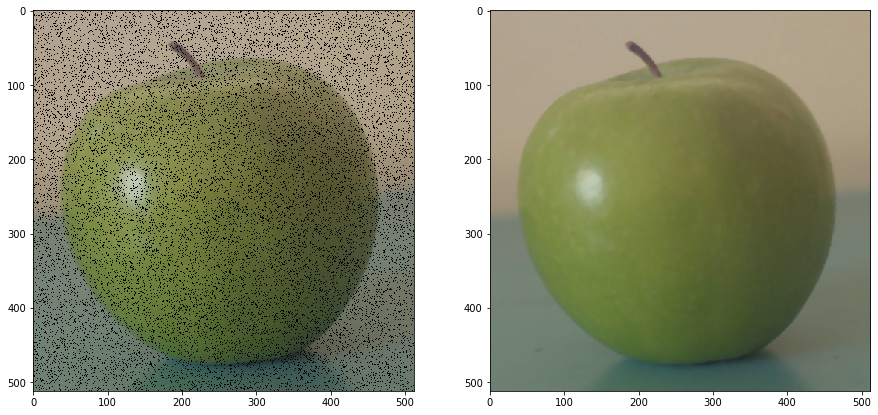

In [5]:
img = cv2.imread('jablko.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


plt.figure(1,figsize=(15,10))

plt.subplot(121)
plt.imshow(img)

plt.subplot(122)
img = cv2.medianBlur(img, 5)
plt.imshow(img)

## Literatura

[1] Alan V. Oppenheim, Ronald W. Schafer; Cyfrowe przetwarzanie sygnałów, Wydawnictwo
Komunikacji i Łączności, Warszawa 1979.
[2] Marcin Wilczewski, http://www.mif.pg.gda.pl/homepages/marcin/Wyklad6.pdf, data dostępu 26.01.2020